### Project Abstract:
Concrete is the most important material in civil engineering.



# Content
#### 1)Data Cleaning
###### 1.1) Finding Out missing values
###### 1.1) Finding Outliers and adjusting outliers
#### 2) Data Exploration
#### 3) Feature Engineering - Gaussian Transformation
#### 4) Feature Selection
#### 5) Algorithm

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# 1) Data Cleaning

In [173]:
data=pd.read_csv('Concrete_Data.csv')
data

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


### 1.1) Finding Out missing values

In [175]:
data.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

- There is no missing values and rows

In [176]:
data.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


### 1.2) Finding Outliers and adjusting outliers

Text(0.5, 1.0, 'Cement')

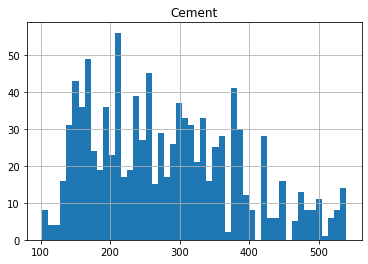

In [177]:
figure=data.cement.hist(bins=50)
figure.set_title('Cement')

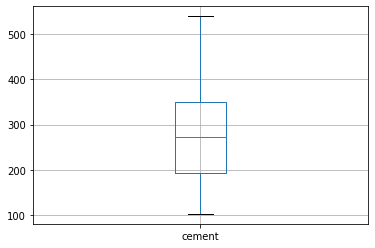

In [178]:
figure=data.boxplot(column="cement")

Text(0.5, 1.0, 'cement')

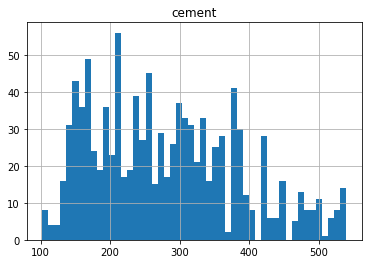

In [179]:
figure=data.cement.hist(bins=50)
figure.set_title('cement')

In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


Text(0.5, 1.0, 'slag')

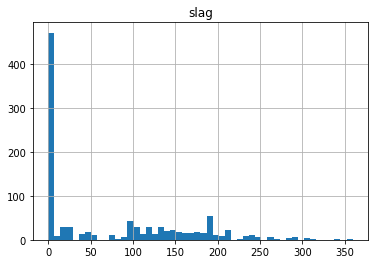

In [181]:
figure=data.slag.hist(bins=50)
figure.set_title('slag')

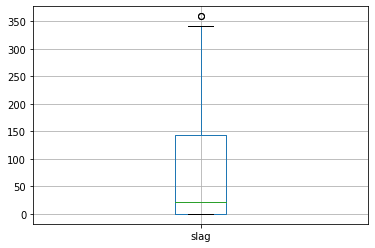

In [182]:
figure=data.boxplot(column="slag")

In [183]:
IQR=data.slag.quantile(0.75)-data.slag.quantile(0.25)

In [184]:
lower_bridge=data['slag'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['slag'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-214.42499999999998
357.375


(None, None)

In [185]:
data.loc[data['slag']>=357,'slag']=357


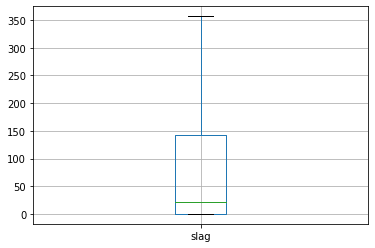

In [186]:
figure=data.boxplot(column="slag")

# Flyash

Text(0.5, 1.0, 'flyash')

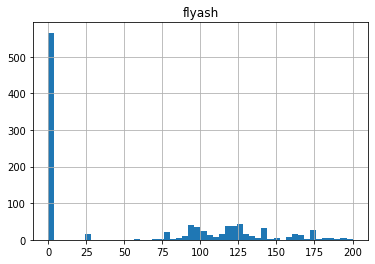

In [187]:
figure=data.flyash.hist(bins=50)
figure.set_title('flyash')

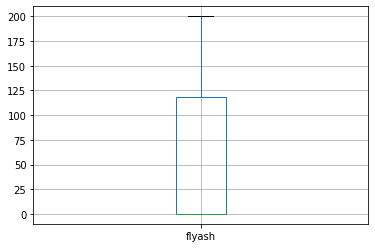

In [188]:
figure=data.boxplot(column="flyash")

# Water

Text(0.5, 1.0, 'water')

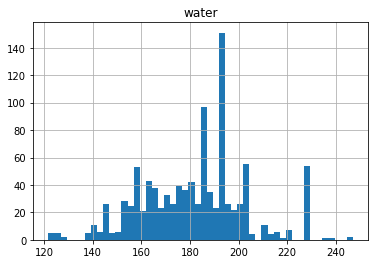

In [189]:
figure=data.water.hist(bins=50)
figure.set_title('water')

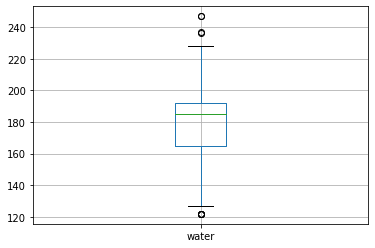

In [190]:
figure=data.boxplot(column="water")

In [191]:
IQR=data.water.quantile(0.75)-data.water.quantile(0.25)

In [192]:
lower_bridge=data['water'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['water'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

124.25000000000001
232.64999999999998


(None, None)

In [193]:
data.loc[data['water']>=232,'water']=232
data.loc[data['water']<=126,'water']=126

Text(0, 0.5, 'No of passenger')

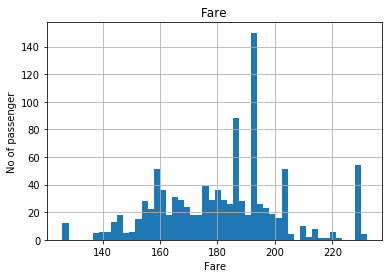

In [194]:
figure=data.water.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

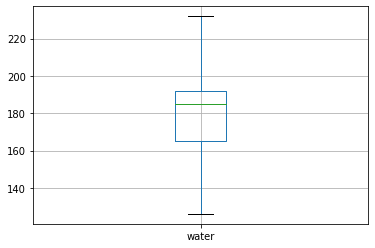

In [195]:
figure=data.boxplot(column="water")

# Superplasticier

Text(0.5, 1.0, 'superplasticizer')

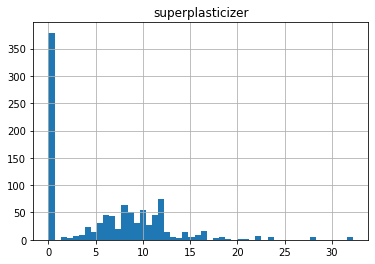

In [196]:
figure=data.superplasticizer.hist(bins=50)
figure.set_title('superplasticizer')

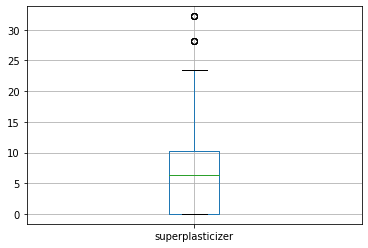

In [197]:
figure=data.boxplot(column="superplasticizer")

In [198]:
IQR=data.superplasticizer.quantile(0.75)-data.superplasticizer.quantile(0.25)

In [199]:
lower_bridge=data['superplasticizer'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['superplasticizer'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-15.299999999999999
25.5


(None, None)

In [200]:
data.loc[data['superplasticizer']>=25,'superplasticizer']=25

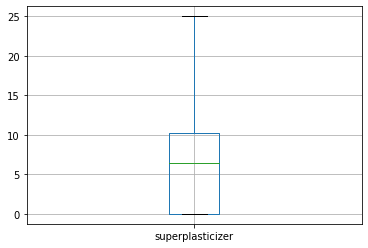

In [201]:
figure=data.boxplot(column="superplasticizer")

# CoarseAggregate

Text(0.5, 1.0, 'coarseaggregate')

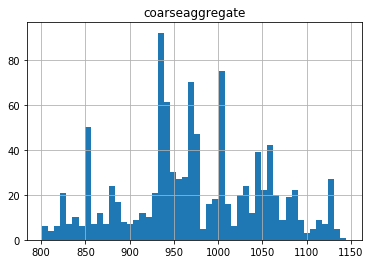

In [202]:
figure=data.coarseaggregate.hist(bins=50)
figure.set_title('coarseaggregate')

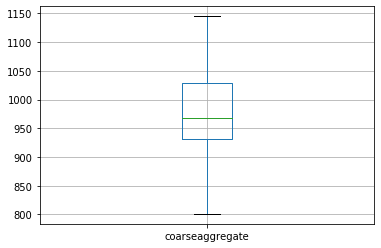

In [203]:
figure=data.boxplot(column="coarseaggregate")

# Fineaggregate

Text(0.5, 1.0, 'fineaggregate')

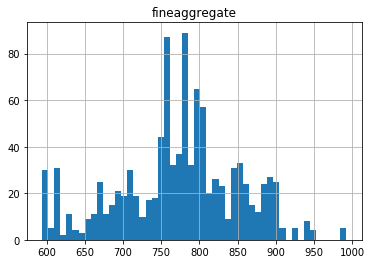

In [204]:
figure=data.fineaggregate.hist(bins=50)
figure.set_title('fineaggregate')

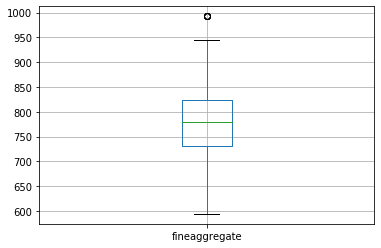

In [205]:
figure=data.boxplot(column="fineaggregate")

In [206]:
IQR=data.fineaggregate.quantile(0.75)-data.fineaggregate.quantile(0.25)

In [207]:
lower_bridge=data['fineaggregate'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['fineaggregate'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

591.3749999999998
963.575


(None, None)

In [208]:
data.loc[data['fineaggregate']>=950,'fineaggregate']=950

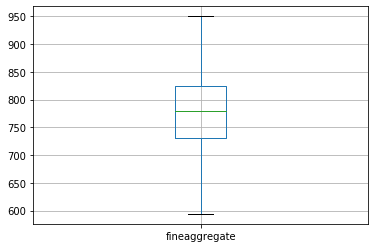

In [209]:
figure=data.boxplot(column="fineaggregate")

# Age

Text(0.5, 1.0, 'age')

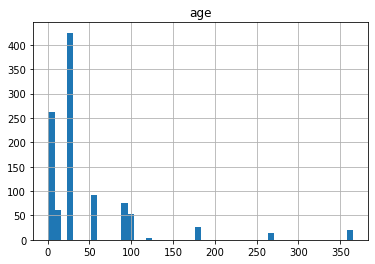

In [210]:
figure=data.age.hist(bins=50)
figure.set_title('age')

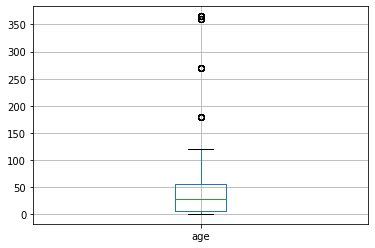

In [211]:
figure=data.boxplot(column="age")

In [212]:
IQR=data.age.quantile(0.75)-data.age.quantile(0.25)

In [213]:
lower_bridge=data['age'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['age'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-66.5
129.5


(None, None)

In [214]:
data.loc[data['age']>=129,'age']=129

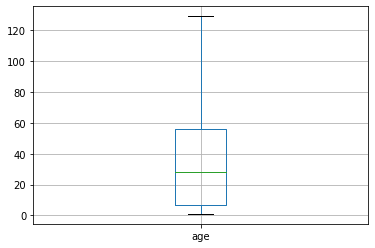

In [215]:
figure=data.boxplot(column="age")

# CompressiveStrength

Text(0.5, 1.0, 'csMPa')

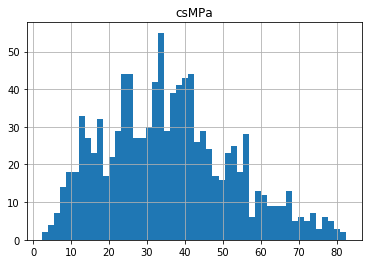

In [216]:
figure=data.csMPa.hist(bins=50)
figure.set_title('csMPa')

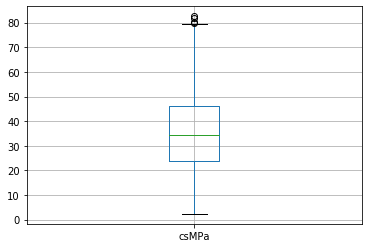

In [217]:
figure=data.boxplot(column="csMPa")

In [218]:
IQR=data.csMPa.quantile(0.75)-data.csMPa.quantile(0.25)

In [219]:
lower_bridge=data['csMPa'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['csMPa'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-9.927500000000013
79.77250000000001


(None, None)

In [220]:
data.loc[data['csMPa']>=79,'csMPa']=79

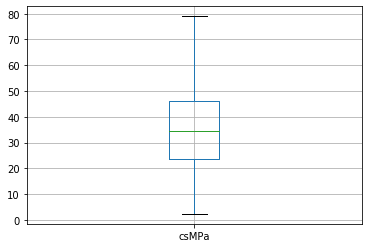

In [221]:
figure=data.boxplot(column="csMPa")

# 2) Data Exploration

- Scatter Plot

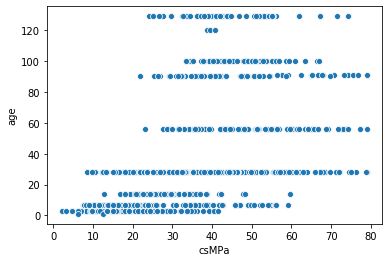

In [222]:
sns.scatterplot(data=data, x="csMPa", y="age")

# 3) Feature Engineering - Gaussian Transformation

- Gaussian Transformation is used only when data is right and left skewed so by plotting can be seen which i have done above while removing ouliers can be seen.So in this case log transformation is used.

In [223]:
import scipy.stats as stat
import pylab

In [224]:

#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(data,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(data[feature],dist='norm',plot=pylab)
    plt.show()

In [225]:
data.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

#### superplasticizer log

In [226]:
data['superplasticizer']=data[np.isfinite(data['superplasticizer'])]

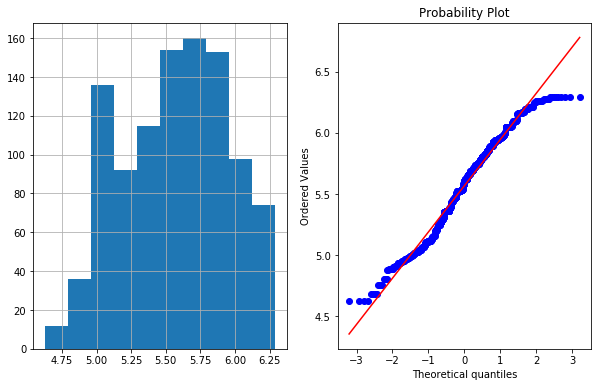

In [227]:
import numpy as np
data['superplasticizer']=np.log(data['superplasticizer'])
plot_data(data,'superplasticizer')

#### fineaggregate log

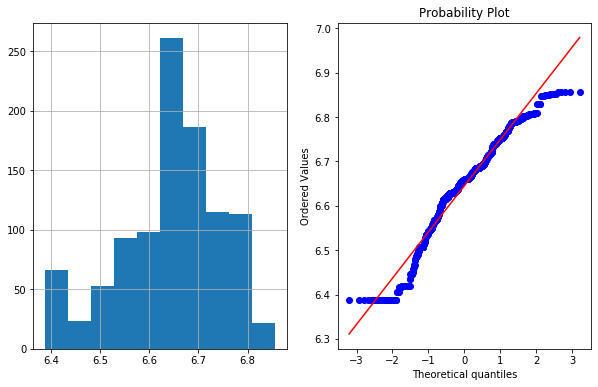

In [228]:
import numpy as np
data['fineaggregate']=np.log(data['fineaggregate'])
plot_data(data,'fineaggregate')

#### Flyash log

In [229]:
data['flyash']=data[np.isfinite(data['flyash'])]

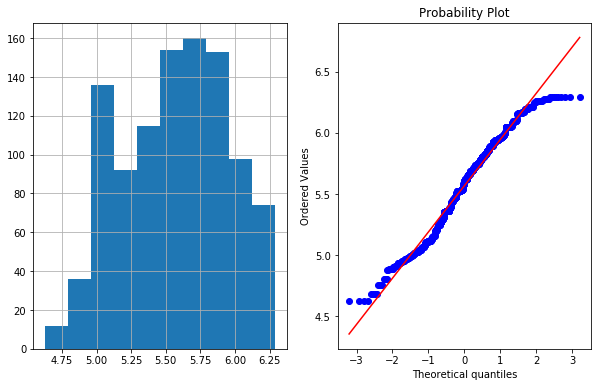

In [230]:
import numpy as np
data['flyash']=np.log(data['flyash'])
plot_data(data,'flyash')

#### slag log

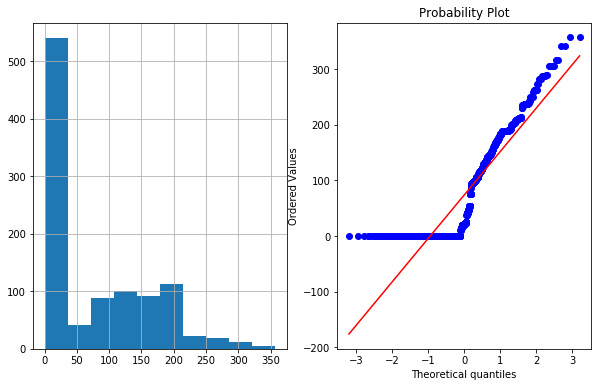

In [231]:
plot_data(data,'slag')

In [232]:
data['slag']=data[np.isfinite(data['slag'])]

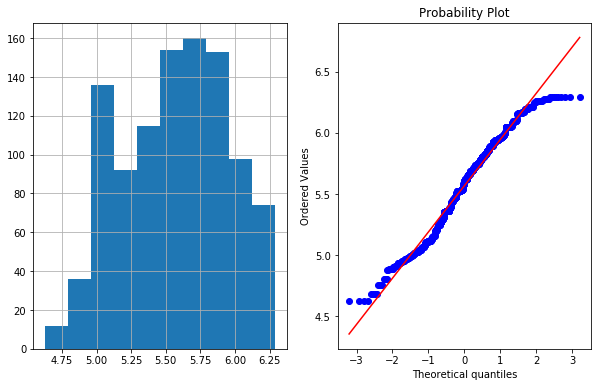

In [233]:
import numpy as np
data['slag']=np.log(data['slag'])
plot_data(data,'slag')

#### coarseaggregate log

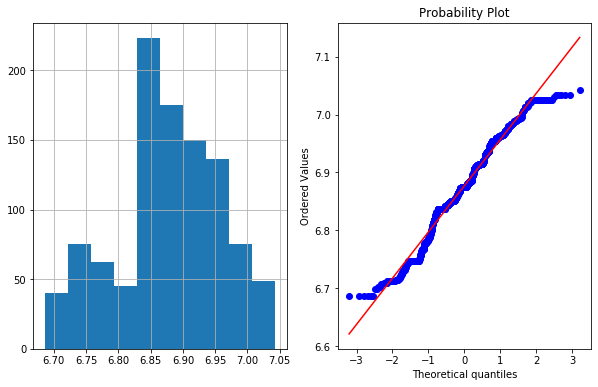

In [234]:
import numpy as np
data['coarseaggregate']=np.log(data['coarseaggregate'])
plot_data(data,'coarseaggregate')

#### age log

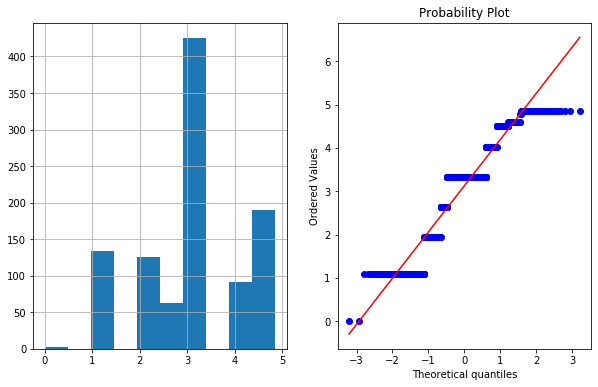

In [235]:
import numpy as np
data['age']=np.log(data['age'])
plot_data(data,'age')

# 4) Feature Selection

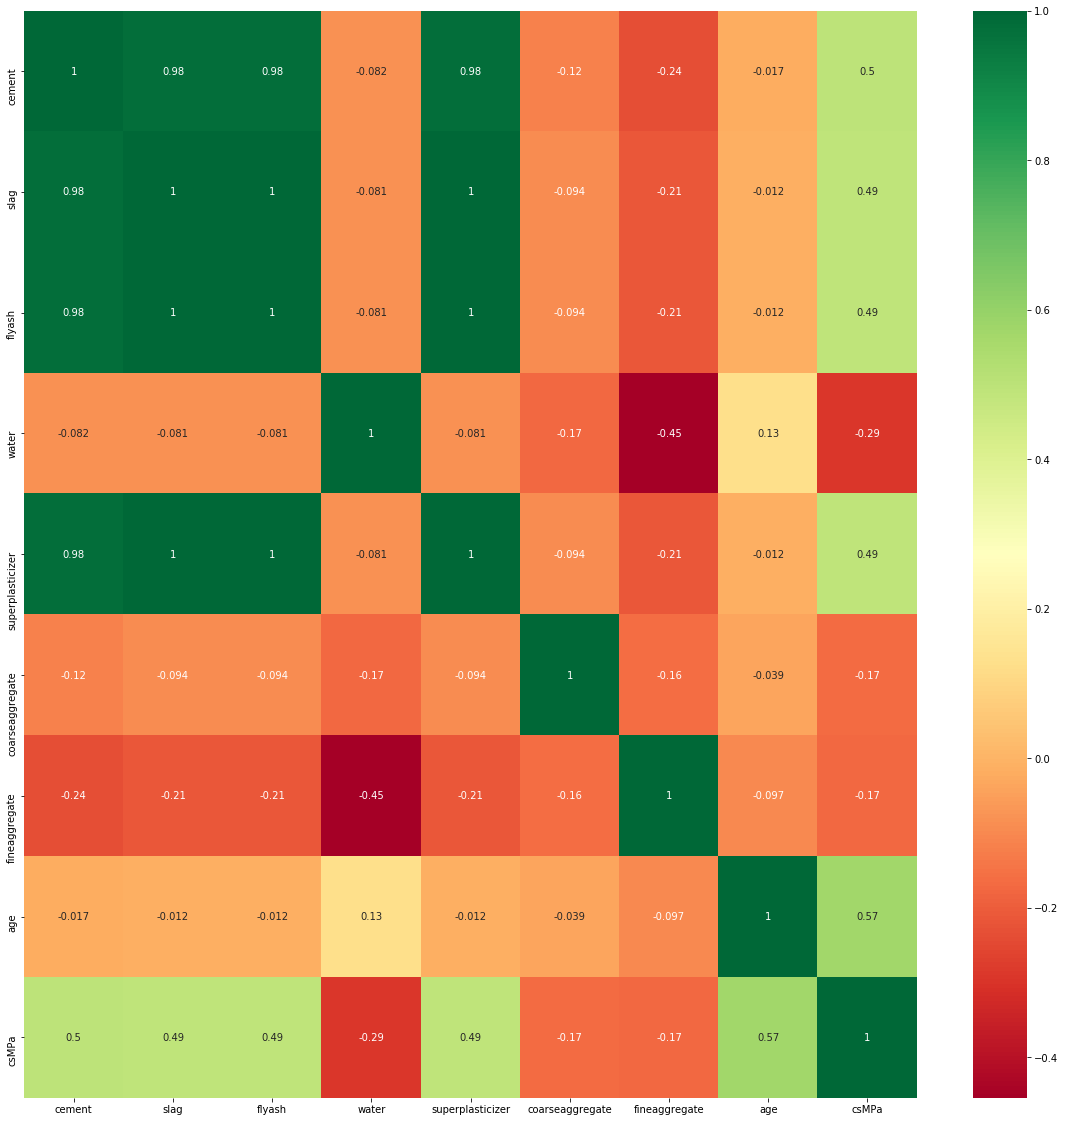

In [236]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Selecting correlation above +0.15 and -0.15 so  selecting all columns

In [237]:
data

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,6.291569,6.291569,162.0,6.291569,6.946976,6.516193,3.332205,79.00
1,540.0,6.291569,6.291569,162.0,6.291569,6.961296,6.516193,3.332205,61.89
2,332.5,5.806640,5.806640,228.0,5.806640,6.837333,6.386879,4.859812,40.27
3,332.5,5.806640,5.806640,228.0,5.806640,6.837333,6.386879,4.859812,41.05
4,198.6,5.291293,5.291293,192.0,5.291293,6.885919,6.715989,4.859812,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,5.621849,5.621849,179.6,5.621849,6.768608,6.644180,3.332205,44.28
1026,322.2,5.775172,5.775172,196.0,5.775172,6.706740,6.701223,3.332205,31.18
1027,148.5,5.000585,5.000585,192.7,5.000585,6.793914,6.659294,3.332205,23.70
1028,159.1,5.069533,5.069533,175.6,5.069533,6.897301,6.670640,3.332205,32.77


# 5) Algorithm

### Linear Regression

In [238]:
X=data.iloc[:,0:8]
y=data.iloc[:,-1]

In [239]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [240]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.7628173569231416

In [241]:
# cross val

In [242]:
from sklearn.model_selection import cross_val_score
cross_val_score(regressor,X,y,cv=2)

array([0.55876261, 0.58864279])

In [243]:
score.mean()

0.7628173569231416

In [244]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
cement,0.031201
slag,2.600393
flyash,2.600393
water,-0.412518
superplasticizer,2.600393
coarseaggregate,-51.027002
fineaggregate,-47.736578
age,9.071569


In [245]:
prediction=regressor.predict(X_test)

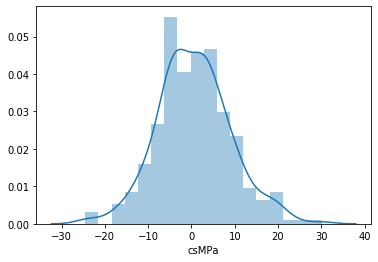

In [246]:
sns.distplot(y_test-prediction)

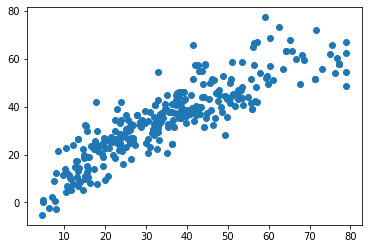

In [247]:
plt.scatter(y_test,prediction)

In [248]:
from sklearn import metrics

In [249]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 6.616913074201941
MSE: 71.98182130862673
RMSE: 8.484210116954126


In [250]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [251]:
lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-80.09460389373001


### Ridge Regression

In [252]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [253]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

C:\Users\VARUN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.15502e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\VARUN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.44107e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\VARUN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.75301e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\VARUN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.00454e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\VARUN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.82362e-17): result may not be accurate.
  overwrite_a=True).T


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [254]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1}
-78.42384376368685


In [255]:
pickle.dump(ridge_regressor,open('model.pkl','wb'))

In [256]:
model=pickle.load(open('model.pkl','rb'))